In [1]:
import pandas as pd
import csv

In [2]:
%%time
df_NSF_ES = pd.read_csv('./Link_NSF_Grants_For_Search-Sup.tsv', sep='\t', dtype=str)
df_NSF_ES

CPU times: user 4.2 s, sys: 442 ms, total: 4.64 s
Wall time: 4.69 s


,NSF_Award_Number,PubRS_DOI,PubRS_Authors,PubRS_Year,PubRS_Title,PubRS_Journal,PubRS_Volume,PubRS_Page,PubRS_Source,DOI,Title
0,0440577,NaN,"Moran A. L., H. A. Woods",2007,Oxygen in egg masses: interactive effects of t...,Journal of Experimental Biology,210,NaN,NaN,NaN,oxygen in egg masses interactive effects of te...
1,0320784,NaN,"Robert C. Romeo, Robert N. Martin, Bruce Twaro...",2006,Progress in the ULTRA 1m Ground-Based Telescope,SPIE Telescopes and Instrumentation Orlando FL,NaN,NaN,NaN,NaN,progress in the ultra 1m groundbased telescope
2,0320784,NaN,"Robert C. Romeo, Robert N. Martin",2006,"Progress in 1-m-Class, Lightweight CFRP Compos...",SPIE Telescopes and Instrumentation Orlando FL,NaN,NaN,NaN,NaN,progress in 1mclass lightweight cfrp composite...
3,1845986,10.1145/3373376.3378497,"Lockerman Elliot, Feldmann Axel, Bakhshalipour...",2020,Livia: Data-Centric Computing Throughout the M...,Proceedings of the 25th international conferen...,NaN,417 to 433,OSTI,10.1145/3373376.3378497,livia datacentric computing throughout the mem...
4,1835178,NaN,"Fortney Susan, Morris Theresa",2021,Eyes Wide Shut: Using Accreditation Regulation...,California law review,12,NaN,OSTI,NaN,eyes wide shut using accreditation regulation ...
...,...,...,...,...,...,...,...,...,...,...,...
753598,1611782,NaN,"Rau M. A., Zahn M.",2018,Sequencing Support for Sense Making and Percep...,Rethinking Learning in the Digital Age Making ...,NaN,NaN,NaN,NaN,sequencing support for sense making and percep...
753599,1611782,NaN,"Cheek K. McNeal, P. Rau M. Tinigin, L.",2018,The Role of Spatial Thinking Skills in Science...,National Association of Research in Science Te...,NaN,NaN,NaN,NaN,the role of spatial thinking skills in science...
753600,1611782,NaN,"Rau M. A., Zahn M., Misback E., Burstyn J.",2019,Adaptive Support for Representation Skills in ...,Artificial Intelligence in Education AIED 2019...,11625,NaN,NaN,NaN,adaptive support for representation skills in ...
753601,1611782,NaN,"Rau M. A., Zahn M.",2018,Sequencing Support for Sense Making and Percep...,Rethinking Learning in the Digital Age Making ...,1,NaN,NaN,NaN,sequencing support for sense making and percep...


In [3]:
%%time
# Read search results.
import _pickle as cpickle
with open('./NSF_es','rb') as fp:
    NSF_es = cpickle.load(fp)

CPU times: user 10.1 s, sys: 1.7 s, total: 11.8 s
Wall time: 11.8 s


In [4]:
len(NSF_es)

753603

In [6]:
NSF_es[-8:]

[{'took': 4435,
  'timed_out': False,
  '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
  'hits': {'total': {'value': 10000, 'relation': 'gte'},
   'max_score': 73.2453,
   'hits': [{'_index': 'mag_index_jan28_2022',
     '_type': 'paper',
     '_id': 'yKMPoH4BF8k1yeWUJx6r',
     '_score': 73.2453,
     '_source': {'mag': 3082616131,
      'info': 'l. herrenkohl, kristine lund, joseph l. polman, j. radinsky, daniel suthers, iris tabak, a kidron 2018 rethinking learning in the digital age making the learning sciences count international conference of learning sciences 2'}},
    {'_index': 'mag_index_jan28_2022',
     '_type': 'paper',
     '_id': '5Iakn34BF8k1yeWUBJ4I',
     '_score': 70.35254,
     '_source': {'mag': 2765582273,
      'info': 'martina a. rau 2018 making connections among multiple visual representations how do sense making skills and perceptual fluency relate to learning of chemistry knowledge instructional science 46 2 209 243'}}]},
  'status': 200

In [7]:
%%time
Score0 = []
Score1 = []
Fail = 0
Equal = 0
for each_es in NSF_es: 
    if len(each_es['hits']['hits']) < 2:
        Fail += 1
        Score0.append(0.0)
        Score1.append(0.0)
    else:
        if each_es['hits']['max_score'] == each_es['hits']['hits'][1]['_score']:
            Equal += 1
        Score0.append(each_es['hits']['max_score'])
        Score1.append(each_es['hits']['hits'][1]['_score'])
print(Fail, Equal)

1 992
CPU times: user 1.02 s, sys: 886 µs, total: 1.02 s
Wall time: 1.02 s


In [8]:
%%time
NSF_ES_list_values = df_NSF_ES[['PubRS_Authors','PubRS_Year','Title', 
                                'PubRS_Journal', 'PubRS_Volume', 'PubRS_Page']].values
query = []
cnt = 0
from tqdm import tqdm
for each in tqdm(NSF_ES_list_values):
    cur_q = []
    for each_r in each:
        if str(each_r) != 'None' and str(each_r).lower() != 'nan' and each_r != '' and each_r != ' ':
            cur_q.append(each_r)
    query.append(' '.join(cur_q))
print(len(query))

100%|██████████| 753603/753603 [00:04<00:00, 170101.81it/s]

753603
CPU times: user 4.42 s, sys: 236 ms, total: 4.66 s
Wall time: 4.77 s


In [9]:
query[-5:]

['Rau M. A., Zahn M. 2018 sequencing support for sense making and perceptual fluency with visual representations is there a learning progression Rethinking Learning in the Digital Age Making the Learning Sciences Count ICLS 2018',
 'Cheek K. McNeal, P. Rau M. Tinigin, L. 2018 the role of spatial thinking skills in science learning examples from geoscience and chemistry National Association of Research in Science Teaching Annual Conference',
 'Rau M. A., Zahn M., Misback E., Burstyn J. 2019 adaptive support for representation skills in a chemistry its is more effective than static support Artificial Intelligence in Education AIED 2019 Lecture Notes in Computer Science 11625',
 'Rau M. A., Zahn M. 2018 sequencing support for sense making and perceptual fluency with visual representations is there a learning progression Rethinking Learning in the Digital Age Making the Learning Sciences Count ICLS 2018 1',
 'Cheek K., McNeal P., Rau M., Tinigin L. 2018 the role of spatial thinking skills 

In [10]:
%%time
Query_Length = [len(each) for each in query]
Query_Length[:5]

CPU times: user 118 ms, sys: 7.92 ms, total: 125 ms
Wall time: 124 ms


[176, 229, 164, 331, 166]

In [11]:
%%time 
import numpy as np
np.mean(Query_Length), np.std(Query_Length)

CPU times: user 154 ms, sys: 6.14 ms, total: 160 ms
Wall time: 158 ms


(185.02618620148806, 60.00997523733719)

Text(0, 0.5, 'Density')

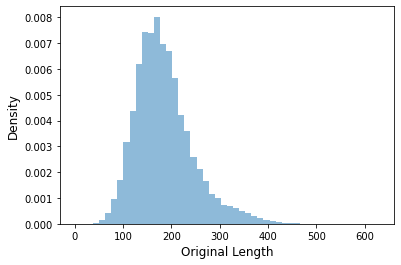

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.hist(Query_Length, bins=50, density=True, alpha=0.5)
ax1.set_xlabel('Original Length',fontsize = 12)
ax1.set_ylabel('Density',fontsize = 12)

# Log-Division

In [13]:
%%time
Normed_Query_Length = []
from collections import defaultdict
Query_ton_Dict = defaultdict(list)
for i,v in enumerate(Query_Length):
#     j = int(v**(1/2))
    j = int(np.log2(v)) if v!=0 else 0
    Normed_Query_Length.append(j)
    Query_ton_Dict[j].append(i)
print(len(Normed_Query_Length))
Normed_Query_Length[:10]

753603
CPU times: user 1.19 s, sys: 43.7 ms, total: 1.23 s
Wall time: 1.23 s


[7, 7, 7, 8, 7, 7, 7, 7, 7, 7]

In [14]:
%%time
len(Query_ton_Dict)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


9

In [15]:
%%time
Query_ton_Dict.keys()

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 14.3 µs


dict_keys([7, 8, 6, 5, 3, 4, 0, 9, 2])

In [16]:
skip = []
for k,v in Query_ton_Dict.items():
    if len(v) < 2:
        skip.append(k)
        print(k)

0


In [17]:
%%time
Score0_N = []
Score1_N = []

for k,v in tqdm(Query_ton_Dict.items()):
    if k in skip:
        continue

    cur_Score1 = [Score1[i] for i in Query_ton_Dict[k]]
    cur_Score0 = [Score0[i] for i in Query_ton_Dict[k]]
    
    mean1 = np.mean(cur_Score1)
    std1 = np.std(cur_Score1)


    for score in cur_Score1:
        Score1_N.append((score - mean1) / std1)

    for score in cur_Score0:
        Score0_N.append((score - mean1) / std1)

100%|██████████| 9/9 [00:01<00:00,  7.79it/s]

CPU times: user 1.05 s, sys: 113 ms, total: 1.16 s
Wall time: 1.16 s


Text(0, 0.5, 'Density')

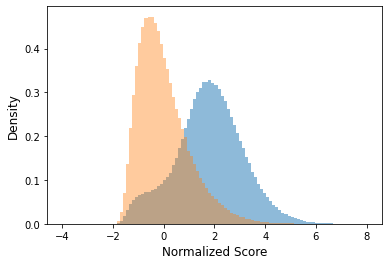

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.hist(Score0_N, bins=100, density=True, alpha=0.5, range=[-4,8])
ax1.hist(Score1_N, bins=100, density=True, alpha=0.4, range=[-4,8])
# ax1.set_ylim([0, 0.7])
ax1.set_xlabel('Normalized Score',fontsize = 12)
ax1.set_ylabel('Density',fontsize = 12)

In [19]:
# newg = ax1.get_figure()
# # newg.savefig("FamilyIDCounts.pdf")
# newg.savefig('foo.pdf')

In [20]:
len([i for i in Score0_N if i > 1.959964]) / len(Score0_N)

0.447031722314962

In [21]:
np.mean(Score1_N)

3.6036188015359606e-16

In [22]:
np.std(Score1_N)

1.0

# SquareRoot-Division

In [23]:
%%time
Normed_Query_Length = []
from collections import defaultdict
Query_ton_Dict = defaultdict(list)
for i,v in enumerate(Query_Length):
#     j = int(np.log2(v)) if v!=0 else 0
    j = int(v**(1/2))
    Normed_Query_Length.append(j)
    Query_ton_Dict[j].append(i)
print(len(Normed_Query_Length))
Normed_Query_Length[:10]

753603
CPU times: user 492 ms, sys: 15.8 ms, total: 507 ms
Wall time: 505 ms


[13, 15, 12, 18, 12, 14, 13, 14, 15, 14]

In [24]:
skip = []
for k,v in Query_ton_Dict.items():
    if len(v) < 2:
        skip.append(k)
        print(k)

0
25


In [25]:
%%time
Score0_N = []
Score1_N = []
Pos_N = []

for k,v in tqdm(Query_ton_Dict.items()):
    if k in skip:
        continue

    cur_Score1 = [Score1[i] for i in Query_ton_Dict[k]]
    cur_Score0 = [Score0[i] for i in Query_ton_Dict[k]]
    cur_Pos = [i for i in Query_ton_Dict[k]]
    mean1 = np.mean(cur_Score1)
    std1 = np.std(cur_Score1)


    for score in cur_Score1:
        Score1_N.append((score - mean1) / std1)
    for score in cur_Score0:
        Score0_N.append((score - mean1) / std1)
    for pos in cur_Pos:
        Pos_N.append(pos)

100%|██████████| 25/25 [00:01<00:00, 14.94it/s]

CPU times: user 1.6 s, sys: 111 ms, total: 1.71 s
Wall time: 1.71 s


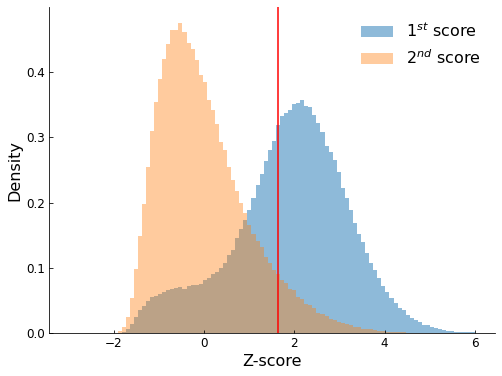

In [26]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(8,6),facecolor='white')
ax1.hist(Score0_N, bins=100, density=True, alpha=0.5, range=[-3,6], label='$1^{st}$ score')
ax1.hist(Score1_N, bins=100, density=True, alpha=0.4, range=[-3,6], label='$2^{nd}$ score')
ax1.axvline(x=1.64485, color='r', linestyle='-')
# ax1.set_ylim([0, 0.7])
ax1.set_xlabel('Z-score',fontsize = 16)
ax1.set_ylabel('Density',fontsize = 16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='y', which='major', labelsize=12, direction='in')
ax1.tick_params(axis='x', which='major', labelsize=12, direction='in')
ax1.legend(loc=0,numpoints=1,fontsize=16,frameon=False)
fig.savefig('./SciNet_NSF_Fig2a.pdf', bbox_inches="tight")

In [27]:
len([i for i in Score0_N if i > 1.959964]) / len(Score0_N)

0.5142734683207693

In [28]:
len([i for i in Score0_N if i > 1.64485]) / len(Score0_N)

0.6199023090468299

In [29]:
np.mean(Score1_N), np.std(Score1_N)

(-7.582506765493577e-17, 0.9999999999999998)

In [30]:
len([i for i in Score0_N if i > 0]) / len(Score0_N)

0.9035179093446001

In [31]:
len([i for i in Score1_N if i > 1.959964]) / len(Score0_N)

0.04926346966100098

In [32]:
len([i for i in Score1_N if i > 1.64485]) / len(Score0_N)

0.073354467417108

In [33]:
len([i for i in Score1_N if i > 0]) / len(Score1_N)

0.4246929077854196

In [34]:
len([a for i,a in enumerate(Score0_N) if Score0_N[i] > Score1_N[i]]) / len(Score0_N)

0.9986836535514151

# Concat

In [35]:
len(query), len(NSF_es)

(753603, 753603)

In [36]:
# cnt = 0
# test_pos = []
# test_score0 = []
# test_score1 = []
# for i,x in enumerate(Score0_N):
#     if Score0_N[i] < 1.959964 and Score0_N[i] - Score1_N[i] > 0.84:
#         test_pos.append(Pos_N[i])
#         test_score0.append(Score0_N[i])
#         test_score1.append(Score1_N[i])
#         if len(test_pos) > 20:
#             break

In [37]:
# test_score0, test_score1

In [38]:
# for x,i in enumerate(test_pos):
#     print(x,query[i])

In [39]:
# for x,i in enumerate(test_pos):
#     print(x,NSF_es[i])

In [40]:
# len([a for i,a in enumerate(Score0_N) if Score0_N[i] -Score1_N[i] > 0.5]) / len(Score0_N)

In [41]:
%%time
Z_Score_diff = [(Score0_N[i] - Score1_N[i]) for i,_ in enumerate(Score0_N)]
Z_Score_diff[-10:]

CPU times: user 160 ms, sys: 11.2 ms, total: 171 ms
Wall time: 169 ms


[3.5010164316597057,
 0.5261379974930285,
 0.02012818465201771,
 1.6631175036048358,
 0.1277791783927651,
 0.20917036417241275,
 0.30094107296915573,
 8.651373960647877,
 0.1976967258619925,
 12.262522401485928]

Text(0, 0.5, 'Density')

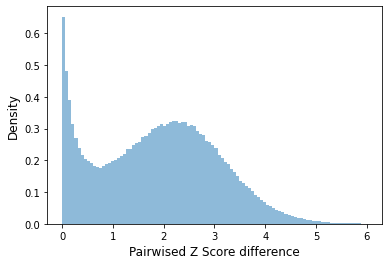

In [42]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
(n2, bins2, patches) = ax1.hist(Z_Score_diff, bins=100, density=True, alpha=0.5, range=[0,6])

xmin, xmax = 0, 5
sel_x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(sel_x, sel_mu, sel_std)
# ax1.plot(sel_x, p, 'k', linewidth=2)
# ax1.axvline(x=1, color='r', linestyle='-')
ax1.set_xlabel('Pairwised Z Score difference',fontsize = 12)
ax1.set_ylabel('Density',fontsize = 12)

In [43]:
x_bins2 = (bins2[1:] + bins2[:-1])/2
len(x_bins2)

100

In [44]:
x_bins2[20:]

array([1.23, 1.29, 1.35, 1.41, 1.47, 1.53, 1.59, 1.65, 1.71, 1.77, 1.83,
       1.89, 1.95, 2.01, 2.07, 2.13, 2.19, 2.25, 2.31, 2.37, 2.43, 2.49,
       2.55, 2.61, 2.67, 2.73, 2.79, 2.85, 2.91, 2.97, 3.03, 3.09, 3.15,
       3.21, 3.27, 3.33, 3.39, 3.45, 3.51, 3.57, 3.63, 3.69, 3.75, 3.81,
       3.87, 3.93, 3.99, 4.05, 4.11, 4.17, 4.23, 4.29, 4.35, 4.41, 4.47,
       4.53, 4.59, 4.65, 4.71, 4.77, 4.83, 4.89, 4.95, 5.01, 5.07, 5.13,
       5.19, 5.25, 5.31, 5.37, 5.43, 5.49, 5.55, 5.61, 5.67, 5.73, 5.79,
       5.85, 5.91, 5.97])

In [45]:
n2[20:]

array([0.21967491, 0.23686397, 0.23688609, 0.24781453, 0.25566797,
       0.2584775 , 0.27347646, 0.27803366, 0.2852013 , 0.2974792 ,
       0.30132849, 0.30776609, 0.31484525, 0.3081643 , 0.31318607,
       0.32185803, 0.32422512, 0.32329598, 0.31763266, 0.32168105,
       0.32210138, 0.30705818, 0.31019955, 0.30672634, 0.29219196,
       0.28283421, 0.28004679, 0.2601588 , 0.25909693, 0.24812425,
       0.2372843 , 0.21713084, 0.208481  , 0.19518547, 0.18788509,
       0.17328435, 0.16193558, 0.15063106, 0.13614092, 0.12704864,
       0.11870852, 0.11140814, 0.1019619 , 0.09198472, 0.08501618,
       0.07417623, 0.06944205, 0.06063735, 0.05541648, 0.04847006,
       0.04293948, 0.03875835, 0.03572759, 0.02975456, 0.0277193 ,
       0.02342757, 0.02265328, 0.01957828, 0.01778637, 0.01473348,
       0.01342826, 0.01057448, 0.00995506, 0.00880469, 0.00847286,
       0.00641548, 0.00575181, 0.00453508, 0.00369443, 0.00382717,
       0.00342896, 0.00280954, 0.00238921, 0.00223436, 0.00170

In [46]:
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

In [48]:
from scipy.optimize import curve_fit
pars, cov = curve_fit(f=gaussian, xdata=x_bins2[40:], ydata=n2[40:], p0=[1.0, 2.0, 1.0], bounds=(-np.inf, np.inf))
pars

array([0.33223784, 2.15691179, 1.03182381])

In [49]:
pars, cov = curve_fit(f=gaussian, xdata=x_bins2[20:], ydata=n2[20:], p0=[1.0, 2.0, 1.0], bounds=(-np.inf, np.inf))

In [50]:
import scipy.stats as st
st.norm.ppf(.95)

1.6448536269514722

In [51]:
st.norm.ppf(.05)

-1.6448536269514729

In [52]:
st.norm.ppf(.05)*pars[2]+pars[1]

0.48841217644268187

In [53]:
xline = x_bins2[20:]
yline = gaussian(xline, pars[0],pars[1],pars[2])

In [54]:
beginxline = x_bins2[0:20]
beginyline = gaussian(beginxline, pars[0],pars[1],pars[2])

In [55]:
# sel_mu, sel_std = pars[1], pars[2]

In [56]:
x_bins2[20]

1.23

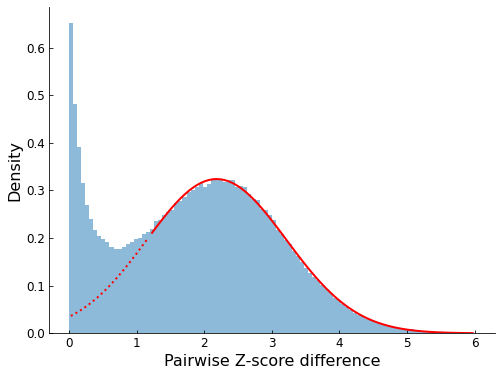

In [57]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(8,6),facecolor='white')
(n2, bins2, patches) = ax1.hist(Z_Score_diff, bins=100, density=True, alpha=0.5, range=[0,6])

xmin, xmax = 0, 5
ax1.plot(beginxline, beginyline, 'r', linewidth=2, linestyle='dotted')
ax1.plot(xline, yline, 'r', linewidth=2)
# ax1.axvline(x=1.23, color='r', linestyle='-')
ax1.set_xlabel('Pairwise Z-score difference',fontsize = 16)
ax1.set_ylabel('Density',fontsize = 16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='y', which='major', labelsize=12, direction='in')
ax1.tick_params(axis='x', which='major', labelsize=12, direction='in')
fig.savefig('./SciNet_NSF_Fig2b.pdf', bbox_inches="tight")

In [58]:
for i,a in enumerate(Score0_N):
    if Score0_N[i] == 0.0:
        print(i)

In [59]:
len([a for i,a in enumerate(Score0_N) if Score0_N[i] > 1.959964]) / len(Score0_N)

0.5142734683207693

In [60]:
len([a for i,a in enumerate(Score0_N) if Score0_N[i] <= 1.959964 and Score0_N[i] -Score1_N[i] > 1.23]) / len(Score0_N)

0.24657610592342633

In [61]:
len([a for i,a in enumerate(Score0_N) if Score0_N[i] > 1.64485]) / len(Score0_N)

0.6199023090468299

In [62]:
len([a for i,a in enumerate(Score0_N) if Score0_N[i] <= 1.64485 and (Score0_N[i] -Score1_N[i]) > 1.23]) / len(Score0_N)

0.16212292711925808

In [63]:
pars[1],pars[2]

(2.184316152570536, 1.0310364085532624)

In [64]:
len(Score0_N), len(Score1_N), len(Z_Score_diff)

(753601, 753601, 753601)

In [65]:
st.norm.cdf(-1.64)

0.05050258347410371

In [66]:
Z_Score_diff[:10]

[2.0621890949993484,
 2.3147279695518566,
 2.3147279695518566,
 0.3390881364128814,
 2.099066897466991,
 1.3839518742481813,
 2.286205944355182,
 0.3390881364128814,
 0.19226701286461834,
 2.493700865120453]

In [68]:
# %%time
# Assign_Score = []
# for each in tqdm(Z_Score_diff):
#     Cur_Score = st.norm.cdf((each-pars[1])/pars[2])
#     Assign_Score.append(Cur_Score)
# print(len(Assign_Score))
# Assign_Score[:10]

In [69]:
# %%time
# # Map [0,1] to [1,9].
# # And round down.
# Diff_Score = []
# for each in tqdm(Assign_Score):
#     Cur_Score = each * 8 + 1
#     Diff_Score.append(int(Cur_Score-0.000001))
# print(len(Diff_Score)) 

In [70]:
# min(Diff_Score), max(Diff_Score)

In [71]:
NSF_Award_Num_List = df_NSF_ES['NSF_Award_Number'].to_numpy(dtype='str')
NSF_Award_Num_List[-5:]

array(['1611782', '1611782', '1611782', '1611782', '1611782'], dtype='<U7')

In [72]:
NSF_Award_Num_List[-1]

'1611782'

In [73]:
# NSF_es[1]

In [74]:
NSF_es[1]['hits']['hits'][0]['_source']['mag']

2008552697

In [75]:
len(query)

753603

In [77]:
len(Score0_N), len(Score1_N)

(753601, 753601)

In [78]:
# %%time
# ES_MAG_NSF_Result_List = []
# for i,_ in tqdm(enumerate(Score0_N)):
#     Score = 0
#     if Score0_N[i] > 1.64485:
#         Score = 9
#     elif Score0_N[i] <= 1.64485 and Diff_Score[i] > 1.23:
#         Score = Diff_Score[i]
#     else:
#         Score = 0
        
#     try:
#         NSF_Award_Num = NSF_Award_Num_List[Pos_N[i]]
#         MAG_ID = NSF_es[Pos_N[i]]['hits']['hits'][0]['_source']['mag']
#     except:
#         print(Pos_N[i])
#         continue
    
#     ES_MAG_NSF_Result_List.append([MAG_ID, NSF_Award_Num, Score])

In [79]:
# %%time
# df_MAG_NSF1 = pd.DataFrame(ES_MAG_NSF_Result_List)
# df_MAG_NSF1

In [80]:
# df_MAG_NSF1.rename(columns={0:'PaperID',1:'NSF_Award_Number',2:'Score'}, inplace=True)
# df_MAG_NSF1

In [81]:
# len(df_MAG_NSF1.loc[df_MAG_NSF1['Score'] == 0, :]) / len(df_MAG_NSF1)

In [82]:
# len(df_MAG_NSF1.loc[df_MAG_NSF1['Score'] == 9, :]) / len(df_MAG_NSF1)

In [83]:
# df_MAG_NSF1['Score'].hist(bins=10)

In [84]:
# len(df_MAG_NSF1.loc[df_MAG_NSF1['Score'] == 9, :])

In [85]:
# df_MAG_NSF1.to_csv('Not_Drop_Duplicates_Link_MAG_NSF_ES.tsv', sep='\t', index=False)

In [86]:
len(Z_Score_diff), len(Score0_N)

(753601, 753601)

In [88]:
max(Z_Score_diff)

12.262522401485928

In [89]:
%%time
ES_MAG_NSF_DiffZ_Result_List = []
for i,_ in tqdm(enumerate(Score0_N)):
    Score = 0
    if Score0_N[i] > 1.64485:
        Score = 90
    else:
        Score = Z_Score_diff[i]
    try:
        NSF_Award_Num = NSF_Award_Num_List[Pos_N[i]]
        MAG_ID = NSF_es[Pos_N[i]]['hits']['hits'][0]['_source']['mag']
    except:
        print(Pos_N[i])
        continue
    
    ES_MAG_NSF_DiffZ_Result_List.append([MAG_ID, NSF_Award_Num, Score])

753601it [00:06, 110570.08it/s]

CPU times: user 5.98 s, sys: 875 ms, total: 6.86 s
Wall time: 6.82 s


In [90]:
%%time
df_MAG_NSF1_DiffZ = pd.DataFrame(ES_MAG_NSF_DiffZ_Result_List)
df_MAG_NSF1_DiffZ

CPU times: user 751 ms, sys: 20 ms, total: 771 ms
Wall time: 765 ms


,0,1,2
0,2124190584,0440577,90.000000
1,2887751497,1821736,90.000000
2,2887751497,1821736,90.000000
3,2950944036,1218454,0.339088
4,3122932617,1218454,90.000000
...,...,...,...
753596,2613895878,1014908,0.209170
753597,27898816,0631175,0.300941
753598,2326130179,1200947,90.000000
753599,2601402825,1316908,0.197697


In [91]:
def assign_type(x):
    if x == 90.0:
        return 'First'
    else:
        return 'Second'

In [92]:
df_MAG_NSF1_DiffZ['Type'] = df_MAG_NSF1_DiffZ[2].apply(assign_type)
df_MAG_NSF1_DiffZ

,0,1,2,Type
0,2124190584,0440577,90.000000,First
1,2887751497,1821736,90.000000,First
2,2887751497,1821736,90.000000,First
3,2950944036,1218454,0.339088,Second
4,3122932617,1218454,90.000000,First
...,...,...,...,...
753596,2613895878,1014908,0.209170,Second
753597,27898816,0631175,0.300941,Second
753598,2326130179,1200947,90.000000,First
753599,2601402825,1316908,0.197697,Second


In [93]:
%%time
df_MAG_NSF1_DiffZ.loc[df_MAG_NSF1_DiffZ[2] == 90.0, 2] = np.nan
df_MAG_NSF1_DiffZ

CPU times: user 14.9 ms, sys: 1.05 ms, total: 15.9 ms
Wall time: 14.7 ms


,0,1,2,Type
0,2124190584,0440577,NaN,First
1,2887751497,1821736,NaN,First
2,2887751497,1821736,NaN,First
3,2950944036,1218454,0.339088,Second
4,3122932617,1218454,NaN,First
...,...,...,...,...
753596,2613895878,1014908,0.209170,Second
753597,27898816,0631175,0.300941,Second
753598,2326130179,1200947,NaN,First
753599,2601402825,1316908,0.197697,Second


In [94]:
df_MAG_NSF1_DiffZ[pd.isnull(df_MAG_NSF1_DiffZ[2])]

,0,1,2,Type
0,2124190584,0440577,NaN,First
1,2887751497,1821736,NaN,First
2,2887751497,1821736,NaN,First
4,3122932617,1218454,NaN,First
6,3122932617,1218454,NaN,First
...,...,...,...,...
753590,2901078652,1450917,NaN,First
753591,2344376072,1136451,NaN,First
753594,2176830675,1444127,NaN,First
753598,2326130179,1200947,NaN,First


In [95]:
df_MAG_NSF1_DiffZ[df_MAG_NSF1_DiffZ['Type']=='First']

,0,1,2,Type
0,2124190584,0440577,NaN,First
1,2887751497,1821736,NaN,First
2,2887751497,1821736,NaN,First
4,3122932617,1218454,NaN,First
6,3122932617,1218454,NaN,First
...,...,...,...,...
753590,2901078652,1450917,NaN,First
753591,2344376072,1136451,NaN,First
753594,2176830675,1444127,NaN,First
753598,2326130179,1200947,NaN,First


In [96]:
df_MAG_NSF1_DiffZ.rename(columns={0:'PaperID',1:'NSF_Award_Number',2:'Diff_ZScore'}, inplace=True)
df_MAG_NSF1_DiffZ

,PaperID,NSF_Award_Number,Diff_ZScore,Type
0,2124190584,0440577,NaN,First
1,2887751497,1821736,NaN,First
2,2887751497,1821736,NaN,First
3,2950944036,1218454,0.339088,Second
4,3122932617,1218454,NaN,First
...,...,...,...,...
753596,2613895878,1014908,0.209170,Second
753597,27898816,0631175,0.300941,Second
753598,2326130179,1200947,NaN,First
753599,2601402825,1316908,0.197697,Second


In [97]:
df_MAG_NSF1_DiffZ.to_csv('Not_Drop_Duplicates_Link_MAG_NSF_ES_DiffZ-Sup.tsv', sep='\t', index=False)

In [1]:
467159 / 1350915

0.3458093218300189